In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.decomposition import PCA
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("C:\\Users\\sabar\\Downloads\\weatherAUS.csv")

# EDA

In [3]:
 df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [6]:
corr=df.corr()
corr.style.background_gradient(cmap='PuBu').set_precision(2)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.00,0.74,0.10,0.47,0.07,0.18,0.18,0.18,-0.23,0.01,-0.45,-0.46,0.08,0.02,0.90,0.71
MaxTemp,0.74,1.00,-0.07,0.59,0.47,0.07,0.01,0.05,-0.50,-0.51,-0.33,-0.43,-0.29,-0.28,0.89,0.98
Rainfall,0.10,-0.07,1.00,-0.06,-0.23,0.13,0.09,0.06,0.22,0.26,-0.17,-0.13,0.20,0.17,0.01,-0.08
Evaporation,0.47,0.59,-0.06,1.00,0.37,0.20,0.19,0.13,-0.50,-0.39,-0.27,-0.29,-0.18,-0.18,0.55,0.57
Sunshine,0.07,0.47,-0.23,0.37,1.00,-0.03,0.01,0.05,-0.49,-0.63,0.04,-0.02,-0.68,-0.70,0.29,0.49
WindGustSpeed,0.18,0.07,0.13,0.20,-0.03,1.00,0.61,0.69,-0.22,-0.03,-0.46,-0.41,0.07,0.11,0.15,0.03
WindSpeed9am,0.18,0.01,0.09,0.19,0.01,0.61,1.00,0.52,-0.27,-0.03,-0.23,-0.18,0.03,0.05,0.13,0.00
WindSpeed3pm,0.18,0.05,0.06,0.13,0.05,0.69,0.52,1.00,-0.15,0.02,-0.30,-0.26,0.05,0.03,0.16,0.03
Humidity9am,-0.23,-0.50,0.22,-0.50,-0.49,-0.22,-0.27,-0.15,1.00,0.67,0.14,0.19,0.45,0.36,-0.47,-0.50
Humidity3pm,0.01,-0.51,0.26,-0.39,-0.63,-0.03,-0.03,0.02,0.67,1.00,-0.03,0.05,0.52,0.52,-0.22,-0.56


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text xticklabel objects>)

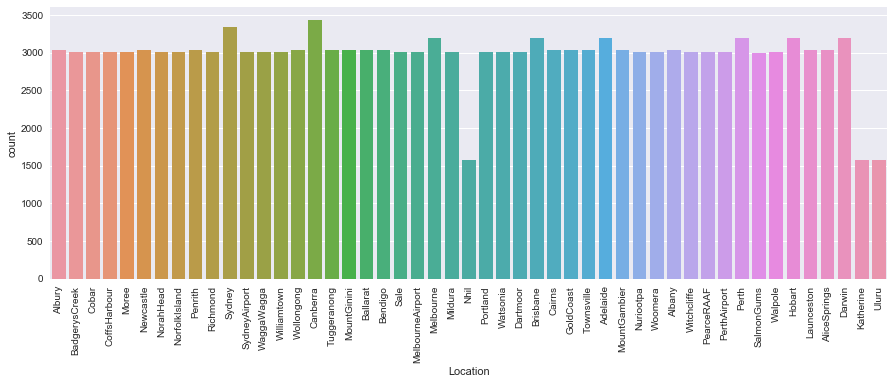

In [7]:
plt.style.use('seaborn')
plt.figure(figsize=(15, 5))
sns.countplot(df['Location'])
plt.xticks(rotation=90)

In [8]:
print(len(df['Location'].unique()))

49


In [9]:
for i in df['WindGustDir'].unique():
    print(f'<option value="{i}">')

<option value="W">
<option value="WNW">
<option value="WSW">
<option value="NE">
<option value="NNW">
<option value="N">
<option value="NNE">
<option value="SW">
<option value="nan">
<option value="ENE">
<option value="SSE">
<option value="S">
<option value="NW">
<option value="SE">
<option value="ESE">
<option value="E">
<option value="SSW">


In [10]:
df.shape


(145460, 23)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [12]:
df.isna().sum()


Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [13]:
thresholdmissing = (df.shape[0]*25)/100

In [14]:
thresholdmissing

36365.0

In [15]:
for i in df.columns:
    if df[i].isna().sum()>thresholdmissing:
        df = df.drop([i],axis=1)


In [16]:
df.shape

(145460, 19)

In [17]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [18]:
df = df.drop(['Date'],axis=1)

In [19]:
df

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No
145456,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No
145457,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No
145458,Uluru,7.8,27.0,0.0,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,No,No


In [20]:
df.head()


,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [21]:
df['Humidity'] = (df['Humidity9am']+df['Humidity3pm'])/2


In [22]:
df['Pressure'] = (df['Pressure9am']+df['Pressure3pm'])/2


In [23]:
df['Temp'] = (df['Temp9am']+ df['Temp3pm'])/2


In [24]:
df.columns


Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow',
       'Humidity', 'Pressure', 'Temp'],
      dtype='object')

In [25]:
df = df.drop(['WindDir9am', 'WindDir3pm', 'WindSpeed9am','WindSpeed3pm', 'Humidity9am', 
         'Humidity3pm', 'Pressure9am','Pressure3pm', 'Temp9am', 'Temp3pm'],axis=1)

In [26]:
df

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,RainToday,RainTomorrow,Humidity,Pressure,Temp
0,Albury,13.4,22.9,0.6,W,44.0,No,No,46.5,1007.40,19.35
1,Albury,7.4,25.1,0.0,WNW,44.0,No,No,34.5,1009.20,20.75
2,Albury,12.9,25.7,0.0,WSW,46.0,No,No,34.0,1008.15,22.10
3,Albury,9.2,28.0,0.0,NE,24.0,No,No,30.5,1015.20,22.30
4,Albury,17.5,32.3,1.0,W,41.0,No,No,57.5,1008.40,23.75
...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.4,0.0,E,31.0,No,No,37.5,1022.45,16.25
145456,Uluru,3.6,25.3,0.0,NNW,22.0,No,No,38.5,1021.30,17.70
145457,Uluru,5.4,26.9,0.0,N,37.0,No,No,38.5,1018.90,19.30
145458,Uluru,7.8,27.0,0.0,SE,28.0,No,No,37.5,1017.95,20.55


In [27]:
df.isna().sum()


Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
WindGustDir      10326
WindGustSpeed    10263
RainToday         3261
RainTomorrow      3267
Humidity          5274
Pressure         15289
Temp              4247
dtype: int64

[]

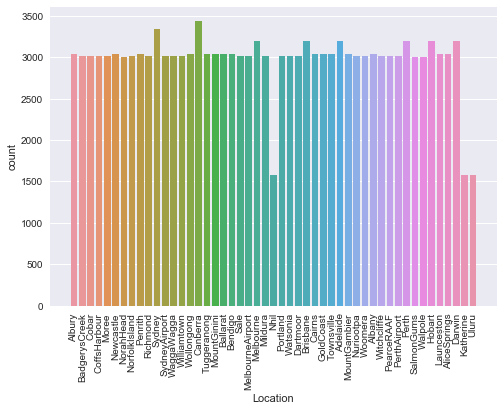

In [28]:
sns.countplot(df['Location'])
plt.xticks(rotation=90)
plt.plot()

In [29]:
df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [30]:
df['Location'].replace('SydneyAirport','Sydney',inplace=True)
df['Location'].replace('MelbourneAirport','Melbourne',inplace=True)
df['Location'].replace('PerthAirport','Perth',inplace=True)

In [31]:
df['Location'].unique()


array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'WaggaWagga', 'Williamtown', 'Wollongong', 'Canberra',
       'Tuggeranong', 'MountGinini', 'Ballarat', 'Bendigo', 'Sale',
       'Melbourne', 'Mildura', 'Nhil', 'Portland', 'Watsonia', 'Dartmoor',
       'Brisbane', 'Cairns', 'GoldCoast', 'Townsville', 'Adelaide',
       'MountGambier', 'Nuriootpa', 'Woomera', 'Albany', 'Witchcliffe',
       'PearceRAAF', 'Perth', 'SalmonGums', 'Walpole', 'Hobart',
       'Launceston', 'AliceSprings', 'Darwin', 'Katherine', 'Uluru'],
      dtype=object)

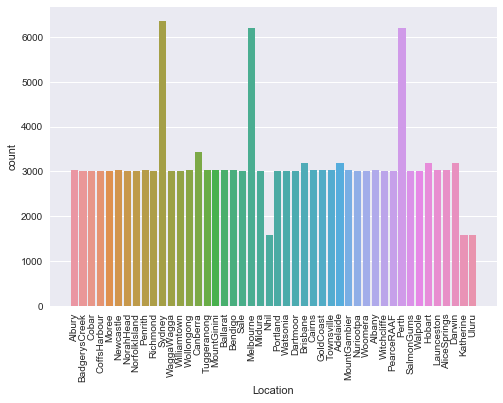

In [32]:
sns.countplot(df['Location'])
plt.xticks(rotation=90)
plt.plot()
plt.show()

In [33]:
df.isna().sum()


Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
WindGustDir      10326
WindGustSpeed    10263
RainToday         3261
RainTomorrow      3267
Humidity          5274
Pressure         15289
Temp              4247
dtype: int64

In [35]:
df['WindGustDir'].unique()


array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

[]

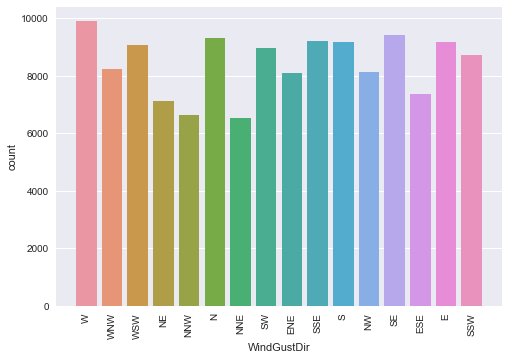

In [36]:
sns.countplot(df['WindGustDir'])
plt.xticks(rotation=90)
plt.plot()

In [37]:
df['WindGustDir'].value_counts()


W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
NW     8122
ENE    8104
ESE    7372
NE     7133
NNW    6620
NNE    6548
Name: WindGustDir, dtype: int64

Text(0.5, 1.0, 'Wind Gust Direction')

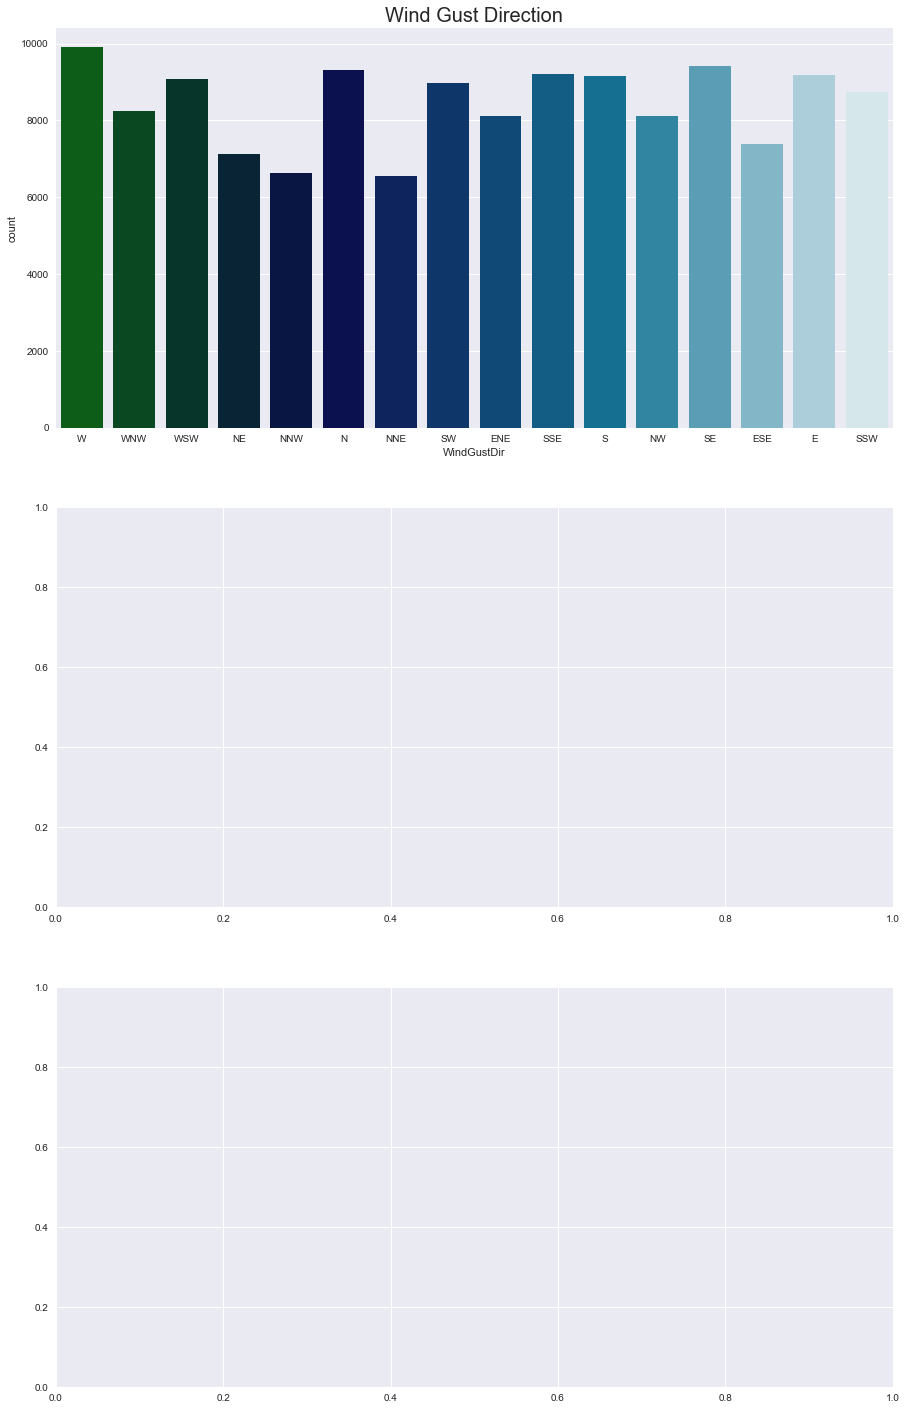

In [38]:
fig, ax = plt.subplots(3, 1, figsize=(15,25))

# WindGustDir
sns.countplot(df['WindGustDir'], palette='ocean', ax=ax[0])
ax[0].set_title("Wind Gust Direction", fontsize=20)

In [39]:
df['RainToday'].unique()


array(['No', 'Yes', nan], dtype=object)

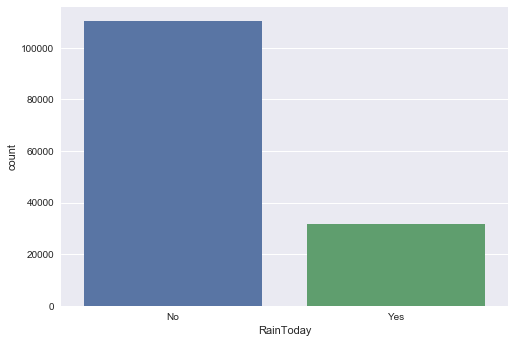

In [40]:
sns.countplot(df['RainToday'])


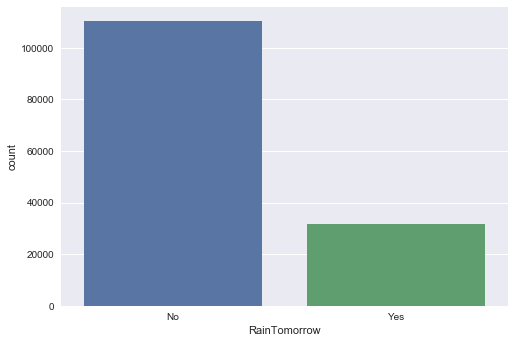

In [41]:
sns.countplot(df['RainTomorrow'])


In [42]:
df['RainTomorrow'].value_counts()


No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [43]:
df.shape[0]*0.30


43638.0

In [44]:
df.head()


,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,RainToday,RainTomorrow,Humidity,Pressure,Temp
0,Albury,13.4,22.9,0.6,W,44.0,No,No,46.5,1007.40,19.35
1,Albury,7.4,25.1,0.0,WNW,44.0,No,No,34.5,1009.20,20.75
2,Albury,12.9,25.7,0.0,WSW,46.0,No,No,34.0,1008.15,22.10
3,Albury,9.2,28.0,0.0,NE,24.0,No,No,30.5,1015.20,22.30
4,Albury,17.5,32.3,1.0,W,41.0,No,No,57.5,1008.40,23.75


In [45]:
df = df[~(df['RainTomorrow'].isna())]
df = df[~(df['RainToday'].isna())]
df = df[~(df['WindGustDir'].isna())]

In [46]:
df

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,RainToday,RainTomorrow,Humidity,Pressure,Temp
0,Albury,13.4,22.9,0.6,W,44.0,No,No,46.5,1007.40,19.35
1,Albury,7.4,25.1,0.0,WNW,44.0,No,No,34.5,1009.20,20.75
2,Albury,12.9,25.7,0.0,WSW,46.0,No,No,34.0,1008.15,22.10
3,Albury,9.2,28.0,0.0,NE,24.0,No,No,30.5,1015.20,22.30
4,Albury,17.5,32.3,1.0,W,41.0,No,No,57.5,1008.40,23.75
...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,E,31.0,No,No,43.0,1022.95,15.15
145455,Uluru,2.8,23.4,0.0,E,31.0,No,No,37.5,1022.45,16.25
145456,Uluru,3.6,25.3,0.0,NNW,22.0,No,No,38.5,1021.30,17.70
145457,Uluru,5.4,26.9,0.0,N,37.0,No,No,38.5,1018.90,19.30


In [47]:
df.isna().sum()


Location             0
MinTemp            114
MaxTemp             51
Rainfall             0
WindGustDir          0
WindGustSpeed        0
RainToday            0
RainTomorrow         0
Humidity          2195
Pressure         10174
Temp              1269
dtype: int64

In [48]:
df.shape


(131624, 11)

In [49]:
df['RainTomorrow'].value_counts()


No     102819
Yes     28805
Name: RainTomorrow, dtype: int64

In [50]:
df = df.reset_index()


In [51]:
df

,index,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,RainToday,RainTomorrow,Humidity,Pressure,Temp
0,0,Albury,13.4,22.9,0.6,W,44.0,No,No,46.5,1007.40,19.35
1,1,Albury,7.4,25.1,0.0,WNW,44.0,No,No,34.5,1009.20,20.75
2,2,Albury,12.9,25.7,0.0,WSW,46.0,No,No,34.0,1008.15,22.10
3,3,Albury,9.2,28.0,0.0,NE,24.0,No,No,30.5,1015.20,22.30
4,4,Albury,17.5,32.3,1.0,W,41.0,No,No,57.5,1008.40,23.75
...,...,...,...,...,...,...,...,...,...,...,...,...
131619,145454,Uluru,3.5,21.8,0.0,E,31.0,No,No,43.0,1022.95,15.15
131620,145455,Uluru,2.8,23.4,0.0,E,31.0,No,No,37.5,1022.45,16.25
131621,145456,Uluru,3.6,25.3,0.0,NNW,22.0,No,No,38.5,1021.30,17.70
131622,145457,Uluru,5.4,26.9,0.0,N,37.0,No,No,38.5,1018.90,19.30


In [52]:
df = df.drop(['index'],axis=1)


In [53]:
df

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,RainToday,RainTomorrow,Humidity,Pressure,Temp
0,Albury,13.4,22.9,0.6,W,44.0,No,No,46.5,1007.40,19.35
1,Albury,7.4,25.1,0.0,WNW,44.0,No,No,34.5,1009.20,20.75
2,Albury,12.9,25.7,0.0,WSW,46.0,No,No,34.0,1008.15,22.10
3,Albury,9.2,28.0,0.0,NE,24.0,No,No,30.5,1015.20,22.30
4,Albury,17.5,32.3,1.0,W,41.0,No,No,57.5,1008.40,23.75
...,...,...,...,...,...,...,...,...,...,...,...
131619,Uluru,3.5,21.8,0.0,E,31.0,No,No,43.0,1022.95,15.15
131620,Uluru,2.8,23.4,0.0,E,31.0,No,No,37.5,1022.45,16.25
131621,Uluru,3.6,25.3,0.0,NNW,22.0,No,No,38.5,1021.30,17.70
131622,Uluru,5.4,26.9,0.0,N,37.0,No,No,38.5,1018.90,19.30


In [54]:
df.head()


,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,RainToday,RainTomorrow,Humidity,Pressure,Temp
0,Albury,13.4,22.9,0.6,W,44.0,No,No,46.5,1007.40,19.35
1,Albury,7.4,25.1,0.0,WNW,44.0,No,No,34.5,1009.20,20.75
2,Albury,12.9,25.7,0.0,WSW,46.0,No,No,34.0,1008.15,22.10
3,Albury,9.2,28.0,0.0,NE,24.0,No,No,30.5,1015.20,22.30
4,Albury,17.5,32.3,1.0,W,41.0,No,No,57.5,1008.40,23.75


In [55]:
raintom = {'No':0,
          'Yes':1}

In [56]:
df['RainTomorrow'] = df['RainTomorrow'].map(raintom)


In [57]:
df

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,RainToday,RainTomorrow,Humidity,Pressure,Temp
0,Albury,13.4,22.9,0.6,W,44.0,No,0,46.5,1007.40,19.35
1,Albury,7.4,25.1,0.0,WNW,44.0,No,0,34.5,1009.20,20.75
2,Albury,12.9,25.7,0.0,WSW,46.0,No,0,34.0,1008.15,22.10
3,Albury,9.2,28.0,0.0,NE,24.0,No,0,30.5,1015.20,22.30
4,Albury,17.5,32.3,1.0,W,41.0,No,0,57.5,1008.40,23.75
...,...,...,...,...,...,...,...,...,...,...,...
131619,Uluru,3.5,21.8,0.0,E,31.0,No,0,43.0,1022.95,15.15
131620,Uluru,2.8,23.4,0.0,E,31.0,No,0,37.5,1022.45,16.25
131621,Uluru,3.6,25.3,0.0,NNW,22.0,No,0,38.5,1021.30,17.70
131622,Uluru,5.4,26.9,0.0,N,37.0,No,0,38.5,1018.90,19.30


In [58]:
df.head()


,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,RainToday,RainTomorrow,Humidity,Pressure,Temp
0,Albury,13.4,22.9,0.6,W,44.0,No,0,46.5,1007.40,19.35
1,Albury,7.4,25.1,0.0,WNW,44.0,No,0,34.5,1009.20,20.75
2,Albury,12.9,25.7,0.0,WSW,46.0,No,0,34.0,1008.15,22.10
3,Albury,9.2,28.0,0.0,NE,24.0,No,0,30.5,1015.20,22.30
4,Albury,17.5,32.3,1.0,W,41.0,No,0,57.5,1008.40,23.75


In [59]:
df['RainTomorrow'].unique()


array([0, 1], dtype=int64)

In [60]:
dfloc = df.groupby(df['Location'])['RainTomorrow'].mean().to_dict()


In [61]:
df['Location']=df['Location'].map(dfloc)
print(dfloc)
df.head()

{'Adelaide': 0.21766666666666667, 'Albury': 0.20516258799865908, 'AliceSprings': 0.07896505376344086, 'BadgerysCreek': 0.19797486033519554, 'Ballarat': 0.2578490313961256, 'Bendigo': 0.18603874415497662, 'Brisbane': 0.22532051282051282, 'Cairns': 0.3153428377460964, 'Canberra': 0.18116883116883117, 'Cobar': 0.12844036697247707, 'CoffsHarbour': 0.29711246200607905, 'Dartmoor': 0.31243611584327086, 'Darwin': 0.2640610104861773, 'GoldCoast': 0.2600349040139616, 'Hobart': 0.238621997471555, 'Katherine': 0.16403162055335968, 'Launceston': 0.22842809364548494, 'Melbourne': 0.22319060250094733, 'Mildura': 0.10896367877374209, 'Moree': 0.12463235294117647, 'MountGambier': 0.3, 'MountGinini': 0.2826169646253328, 'Nhil': 0.1548304542546385, 'NorahHead': 0.27565880721220526, 'NorfolkIsland': 0.3081695966907963, 'Nuriootpa': 0.1951219512195122, 'PearceRAAF': 0.16070726915520628, 'Penrith': 0.19896729776247848, 'Perth': 0.1955779548040969, 'Portland': 0.3672297297297297, 'Richmond': 0.1892078865444

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,RainToday,RainTomorrow,Humidity,Pressure,Temp
0,0.205163,13.4,22.9,0.6,W,44.0,No,0,46.5,1007.40,19.35
1,0.205163,7.4,25.1,0.0,WNW,44.0,No,0,34.5,1009.20,20.75
2,0.205163,12.9,25.7,0.0,WSW,46.0,No,0,34.0,1008.15,22.10
3,0.205163,9.2,28.0,0.0,NE,24.0,No,0,30.5,1015.20,22.30
4,0.205163,17.5,32.3,1.0,W,41.0,No,0,57.5,1008.40,23.75


In [62]:
dfdir = df.groupby(df['WindGustDir'])['RainTomorrow'].mean().to_dict()
print(dfdir)

{'E': 0.14657762938230384, 'ENE': 0.15901060070671377, 'ESE': 0.16151297625621203, 'N': 0.26865003914550944, 'NE': 0.18494715795487005, 'NNE': 0.22865662272441933, 'NNW': 0.2822915066810014, 'NW': 0.2826552462526767, 'S': 0.22203408962636867, 'SE': 0.1850449085596797, 'SSE': 0.1922515440763616, 'SSW': 0.21789017679428638, 'SW': 0.20075844633417606, 'W': 0.2651608910891089, 'WNW': 0.2791457286432161, 'WSW': 0.2308566234946603}


In [63]:
df['WindGustDir']=df['WindGustDir'].map(dfdir)


In [64]:
df.head()


,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,RainToday,RainTomorrow,Humidity,Pressure,Temp
0,0.205163,13.4,22.9,0.6,0.265161,44.0,No,0,46.5,1007.40,19.35
1,0.205163,7.4,25.1,0.0,0.279146,44.0,No,0,34.5,1009.20,20.75
2,0.205163,12.9,25.7,0.0,0.230857,46.0,No,0,34.0,1008.15,22.10
3,0.205163,9.2,28.0,0.0,0.184947,24.0,No,0,30.5,1015.20,22.30
4,0.205163,17.5,32.3,1.0,0.265161,41.0,No,0,57.5,1008.40,23.75


In [65]:
dftoday = df.groupby(df['RainToday'])['RainTomorrow'].mean().to_dict()
print(dftoday)

{'No': 0.14960652956147794, 'Yes': 0.4630438521066208}


In [66]:
df['RainToday']=df['RainToday'].map(dftoday)


In [67]:
df = df.drop(['MinTemp','MaxTemp'],axis=1)


In [68]:
df.head()


,Location,Rainfall,WindGustDir,WindGustSpeed,RainToday,RainTomorrow,Humidity,Pressure,Temp
0,0.205163,0.6,0.265161,44.0,0.149607,0,46.5,1007.40,19.35
1,0.205163,0.0,0.279146,44.0,0.149607,0,34.5,1009.20,20.75
2,0.205163,0.0,0.230857,46.0,0.149607,0,34.0,1008.15,22.10
3,0.205163,0.0,0.184947,24.0,0.149607,0,30.5,1015.20,22.30
4,0.205163,1.0,0.265161,41.0,0.149607,0,57.5,1008.40,23.75


In [69]:
df.isna().sum()


Location             0
Rainfall             0
WindGustDir          0
WindGustSpeed        0
RainToday            0
RainTomorrow         0
Humidity          2195
Pressure         10174
Temp              1269
dtype: int64

In [70]:
estimator = LinearRegression()
imp = IterativeImputer(estimator,max_iter=100)

In [71]:
dfnew = imp.fit_transform(df)

In [72]:
dfnew = pd.DataFrame(dfnew,columns = df.columns)


In [73]:
dfnew.isna().sum()


Location         0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
RainToday        0
RainTomorrow     0
Humidity         0
Pressure         0
Temp             0
dtype: int64

In [74]:
x = dfnew.drop(['RainTomorrow'],axis=1)
y = dfnew[['RainTomorrow']]

In [75]:
print(x['Location'].unique)


<bound method Series.unique of 0         0.205163
1         0.205163
2         0.205163
3         0.205163
4         0.205163
            ...   
131619    0.076403
131620    0.076403
131621    0.076403
131622    0.076403
131623    0.076403
Name: Location, Length: 131624, dtype: float64>


In [76]:
y.head()
print(x.columns)
y['RainTomorrow'] = df['RainTomorrow'].astype('category')

Index(['Location', 'Rainfall', 'WindGustDir', 'WindGustSpeed', 'RainToday',
       'Humidity', 'Pressure', 'Temp'],
      dtype='object')


C:\Users\sabar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [77]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3,random_state=42)


In [78]:
train_x.shape,test_x.shape,train_y.shape,test_y.shape


((92136, 8), (39488, 8), (92136, 1), (39488, 1))

In [79]:
sm = SMOTE(random_state=42)


In [80]:
train_x_sm,train_y_sm = sm.fit_resample(train_x,train_y)


In [81]:
train_y_sm.value_counts()


RainTomorrow
0               72024
1               72024
dtype: int64

In [82]:
model = XGBClassifier(n_estimators=350,subsample =1.0,max_depth=6,learning_rate=0.12244897959183673,
                     gamma=8,colsample_bytree=0.8,booster='gbtree')

In [83]:
model.fit(train_x_sm,train_y_sm)


C:\Users\sabar\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\sabar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[08:24:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=8, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.12244897959183673, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=350, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1.0,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [84]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

In [85]:
print(accuracy_score(pred_train,train_y))


0.8623665016931492


In [86]:
print(accuracy_score(pred_test,test_y))


0.8556270259319287


In [87]:
cm=confusion_matrix(pred_test,test_y)

In [88]:
cm

array([[29091,  3997],
       [ 1704,  4696]], dtype=int64)

In [90]:
cl=LogisticRegression()

In [91]:
cl.fit(train_x_sm,train_y_sm)

C:\Users\sabar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [92]:
pred_train_lr=cl.predict(train_x)
pred_test_lr=cl.predict(test_x)

In [93]:
print(accuracy_score(pred_train_lr,train_y))
print(accuracy_score(pred_test_lr,test_y))

0.7643700616479986
0.7672204213938412


In [94]:
confusion_matrix(pred_test_lr,test_y)

array([[23725,  2122],
       [ 7070,  6571]], dtype=int64)